In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r"C:\Users\merry\Downloads\UWE\IGP Project\UWE Carbon Emissions\TravelWest 2023 survey results for sharing with MSc studetns.xlsx")
#data.head()

In [3]:
data.isnull()                         #checking for null values
total_null = data.isnull().sum()      
print(total_null, '\n')                         #printing the null values
print("1. ", total_null.sum(), " null values identified") 

Which site do you work at? If you work from home please s...                                                                                                      0
How many hours (excluding overtime) do you typically work in a week for this organisation?                                                                        0
Full time or part time                                                                                                                                            0
How long have you worked for your current employer?                                                                                                               0
Where are you usually working at the moment?                                                                                                                      0
Other – please specify                                                                                                                                          577
Days per week at

#### As this data is the raw survey results and is being used for further analysis, we are not going to drop any rows based on null values. 

In [4]:
data.rename(columns={'Which site do you work at? If you work from home please s...': 'UWE Campus'}, inplace=True)
data.rename(columns={'Full time or part time': 'Job contract'}, inplace=True)
data.rename(columns={'How do you normally travel to work? If your normal journey involves more than one type of transport, please select the one you use for the longest distance.': 'Mode of transport'}, inplace=True)


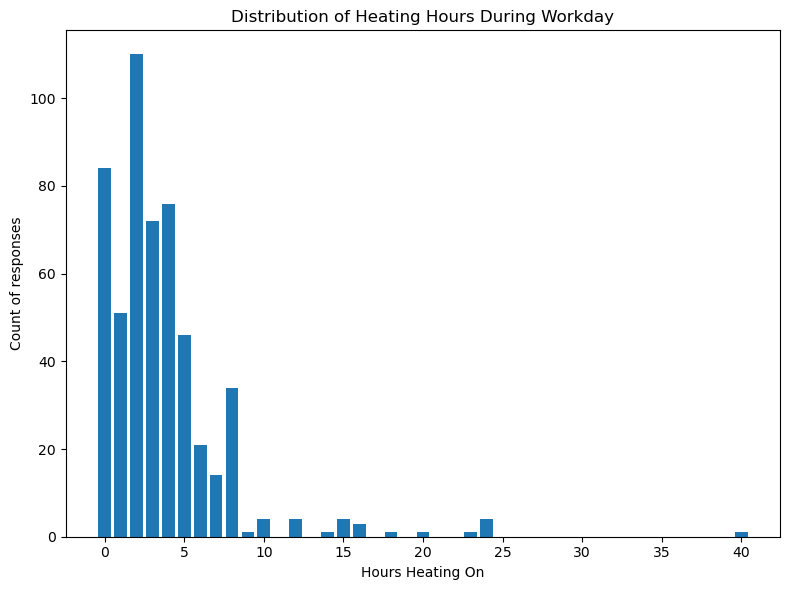

In [5]:


heating_hours = data['When you put the heating on, how many hours of your working day would it be on?']

#plt.figure(figsize=(8, 6))  # Adjust figure size as needed
#plt.boxplot(heating_hours, vert=False)  # Set vert=False for horizontal boxplot
#plt.xlabel('Hours Heating On')
#plt.ylabel('Count of responses')  # Label can be adjusted if needed
#plt.title('Distribution of Heating Hours During Workday (Box Plot)')
#plt.xticks(rotation=0)  # Ensure horizontal x-axis labels
#plt.tight_layout()
#plt.show()


# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(heating_hours.value_counts().index, heating_hours.value_counts().values)  # Plot data points
plt.xlabel('Hours Heating On')
plt.ylabel('Count of responses')
plt.title('Distribution of Heating Hours During Workday')
plt.xticks(rotation=0)  # Ensure horizontal x-axis labels
plt.tight_layout()
plt.show()

### Most of the respondents 

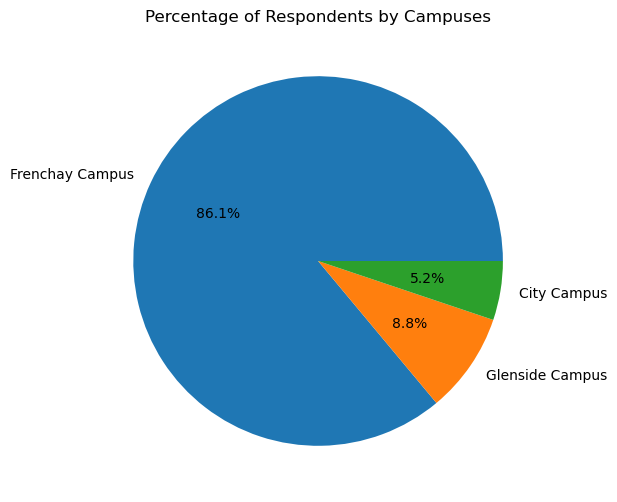

In [6]:
campuses = data['UWE Campus'].value_counts()

plt.figure(figsize=(6, 6)) 
plt.pie(campuses, labels=campuses.index, autopct='%1.1f%%')
plt.title('Percentage of Respondents by Campuses')
plt.show()

#### Most of the respondents work at the Frenchay campus.

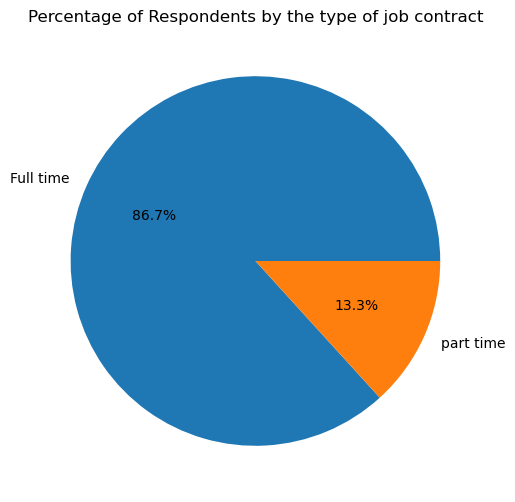

In [7]:
contract = data['Job contract'].value_counts()

plt.figure(figsize=(6, 6)) 
plt.pie(contract, labels=contract.index, autopct='%1.1f%%')
plt.title('Percentage of Respondents by the type of job contract')
plt.show()

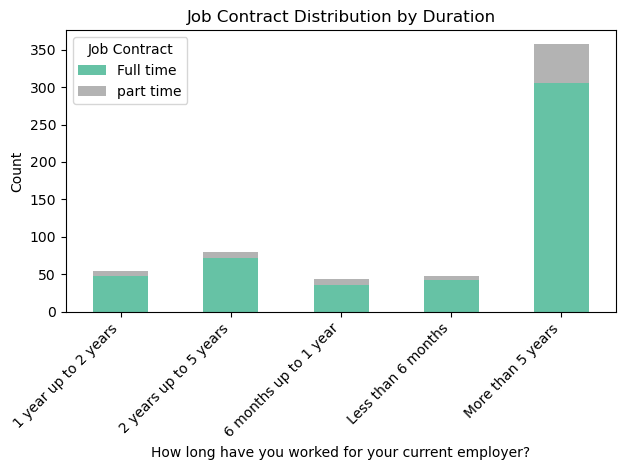

In [8]:
df = pd.DataFrame(data)

job_contract_per_dept = pd.crosstab(df['How long have you worked for your current employer?'], df['Job contract'])

# Filter 'Full time' and 'Part time' contracts
job_contract_per_dept_filtered = job_contract_per_dept[['Full time', 'part time']]


job_contract_per_dept_filtered.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Job Contract Distribution by Duration')
plt.xlabel('How long have you worked for your current employer?')
plt.ylabel('Count')
plt.legend(title='Job Contract', labels=['Full time', 'part time'])  
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Majority of the employees, both full time and part time, have been working for UWE for more than 5 years.

In [9]:
contract = data['Where are you usually working at the moment?'].value_counts()

print(data['Where are you usually working at the moment?'].unique())

filtered_data = data[data['Where are you usually working at the moment?'] == 'Other']

print(filtered_data[['Where are you usually working at the moment?', 'Other – please specify']].to_string(index=False))

data.loc[data['Where are you usually working at the moment?'] == 'Other', 'Where are you usually working at the moment?'] = 'Hybrid'

print(data['Where are you usually working at the moment?'].unique())

['At a workplace (office, lab, warehouse etc.)' 'At home ' 'Other' 'e']
Where are you usually working at the moment?                                                      Other – please specify
                                       Other                                      50% at home and 50% at office location
                                       Other                           50:50 split - 2 days on campus and 2 days at home
                                       Other my time is usually split equally between working at home and at a workplace
                                       Other                                      Hybrid, both in the office and at home
['At a workplace (office, lab, warehouse etc.)' 'At home ' 'Hybrid' 'e']


### Replacing 'Other' with 'Hybrid' as all of the respondents have specified that they they work equally from office and home.

In [10]:
e_count = data['Where are you usually working at the moment?'].value_counts().get('e', 0)  # Handle potential absence of 'e'
print(e_count)

1


### excluding 'e' from the column values as someone might have entered it by mistake and it occurs only once as well.

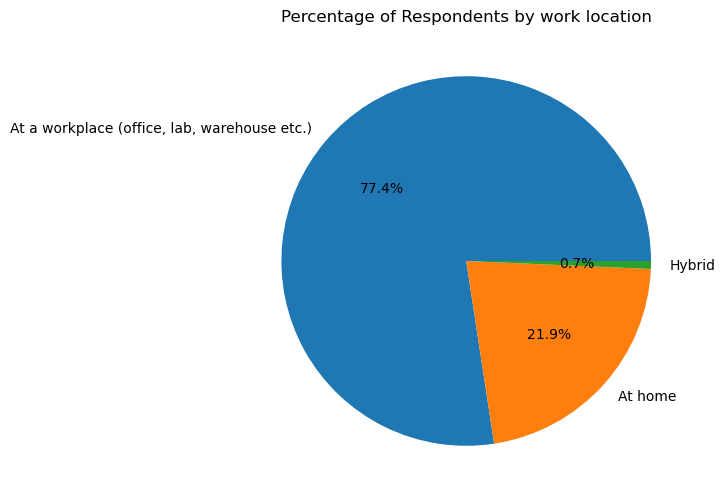

In [11]:
filtered = data[data['Where are you usually working at the moment?'] != 'e']

work_loc = filtered['Where are you usually working at the moment?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(work_loc, labels=work_loc.index, autopct='%1.1f%%')
plt.title('Percentage of Respondents by work location')
plt.show()

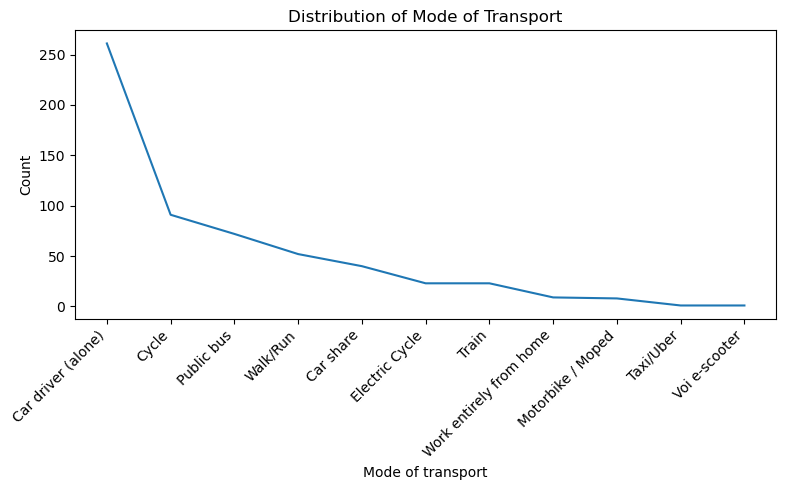

In [12]:
mode_transport = data['Mode of transport'].value_counts()

plt.figure(figsize=(8, 5))  # Adjusting figure size
plt.plot(mode_transport.index, mode_transport.values)
plt.xlabel('Mode of transport')
plt.ylabel('Count')
plt.title('Distribution of Mode of Transport')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### A big majority of the employees drive their own car to work.

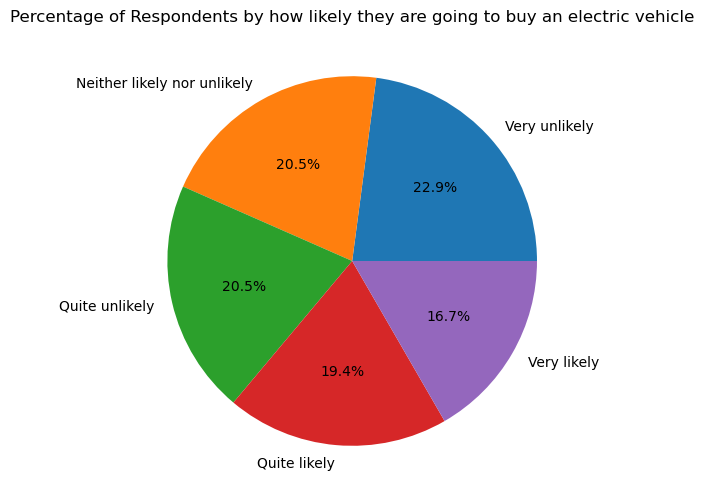

In [13]:


elec_vehicle = data['How likely are you to consider purchasing/leasing an electric vehicle when you next get a vehicle?'].value_counts()

plt.figure(figsize=(6, 6)) 
plt.pie(elec_vehicle, labels=elec_vehicle.index, autopct='%1.1f%%')
plt.title('Percentage of Respondents by how likely they are going to buy an electric vehicle')
plt.show()

### Collectively, 36% of the respondents have respondents they they are likely to buy an electic car on their next vehicle purchase.